### Partie I - Chargement de la dataset

In [1]:
from imutils import paths
import numpy as np
import imutils
import cv2
import os

In [2]:
def face_detection(image):
  cascadePath = "haarcascade_frontalface_default.xml"
  detector = cv2.CascadeClassifier(cascadePath)

  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  rects = detector.detectMultiScale(gray, scaleFactor=1.05,
	minNeighbors=10, minSize=(30, 30),
	flags=cv2.CASCADE_SCALE_IMAGE)

  return rects

In [3]:
def chargerDB(inputPath):
    # get all the image paths in the dataset folder structure and grab 
    # the name(i.e. groundtruth) of all the images and count each of them
    # and then put all of the groundtruths into a list
    imagePaths = list(paths.list_images(inputPath))
    names = [p.split(os.path.sep)[-2] for p in imagePaths]
    (names , counts) = np.unique(names , return_counts = True)
    names = names.tolist()

    Imgs = []
    labels = []

    # loop over all of the image paths
    i = 0
    name_cp = imagePaths[0].split(os.path.sep)[-2]
    for imagePath in imagePaths:
        # read the image and grab the image label
        image = cv2.imread(imagePath)
        name = imagePath.split(os.path.sep)[-2]
        if (name_cp != name) :
            i = 0
        
        # check whether the count of this specific label is
        # below our minSamples threshold or not
        #if counts[names.index(name)] < minSamples:
          #continue

        # perform face detection
        boxes = face_detection(image)
        
        # loop over the bounding boxes
        for (x , y , w , h) in boxes:
            try:
                # extract the face ROI, resize it and convert
                # it into grayscale format
                faceROI = image[y:y+h , x:x+w]
                faceROI = cv2.cvtColor(faceROI , cv2.COLOR_BGR2GRAY)
                faceROI = cv2.resize(faceROI, (100,100))
                
                cv2.imwrite("Faces\\{0} {1}.jpg".format(name,i), faceROI)
                
                # update the faces and labels list
                Imgs.append(faceROI)
                labels.append(name)
            except:
                continue
            i = i+1
        name_cp = name
              
    # convert the faces and labels lists into Numpy array
    Imgs = np.array(Imgs)
    labels = np.array(labels)

    return (Imgs , labels)

In [4]:
faces, labels = chargerDB('Dataset - Equipe Maroc')

In [16]:
# grab the mean of f1-scores
mu = np.mean(f1_scores)
# grab the standard deviation of f1-scores
sigma = np.std(f1_scores)

print("The mean of f1-scores is : " , mu)
print("The standard deviation of f1-scores is : " , sigma)

The mean of f1-scores is :  0.91055554
The standard deviation of f1-scores is :  0.11769914


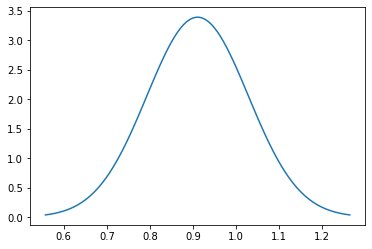

In [17]:
# calculate and divide the normal dist. range into 100 points
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# plot the normal dist. based on the probability distribution function 
# values 
plt.plot(x, stats.norm.pdf(x, mu, sigma))
# save the plot in the desired directory
#plt.savefig("output/model-performance/f-scores-dist.png")
plt.show()